In [1]:
import pandas as pd 
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
website_url = "https://developer.spotify.com/documentation/web-api/reference/get-an-artists-top-tracks"
api_url_toptracks = "https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5/top-tracks?market=US"
api_url_relatedartist = "https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5/related-artists"
api_url_audioanalysis = "https://api.spotify.com/v1/audio-analysis/6c6WmIHcHlhccEwSFBhzNa"
api_url_audiofeatures = "https://api.spotify.com/v1/audio-features/6c6WmIHcHlhccEwSFBhzNa"
#putitonthefloor = song 1 
api_url_audiofeatures2 = "https://api.spotify.com/v1/audio-features/0ZxhtATQ0a6EvQNZ0z6NKV"
#song2 = princess diana 
api_url_audiofeatures3 = "https://api.spotify.com/v1/audio-features/7sliFe6W30tPBPh6dvZsIH"
#song3 = area codes

In [3]:
#curl -X POST "https://accounts.spotify.com/api/token" \
#>      -H "Content-Type: application/x-www-form-urlencoded" \
#>      -d "grant_type=client_credentials&client_id=da519c39baed4bab992606419ed1ad08&client_secret=e79d7d4c32054e56be93516339acebc3"
#{"access_token":"BQBwBD7_2LLnnjKqIW9tKRDbARos2Wp1ch9v_IsXiWe0hp1oetN1hth2PxUTi6zFPhdNZeZoU-2mhlYxKdi8KMr6p9XF62hYfBjsp6RRyG6QwlUPC6w","token_type":"Bearer","exp

In [4]:
data = {
    "grant_type": "client_credentials",
    "client_id": "da519c39baed4bab992606419ed1ad08",
    "client_secret": "e79d7d4c32054e56be93516339acebc3"
}
headers = {
    "Content-Type": "application/x-www-form-urlencoded"
}
response = requests.post("https://accounts.spotify.com/api/token",data=data,headers=headers)
access_token = "Bearer " + response.json()['access_token']

In [5]:
headers = {
        'Authorization' : access_token,
}
response_top_tracks = requests.get(api_url_toptracks, headers = headers)
response_relatedartist = requests.get(api_url_relatedartist, headers = headers)
response_audio = requests.get(api_url_audioanalysis, headers = headers)
response_audio_features = requests.get(api_url_audiofeatures, headers = headers)

In [7]:
dojacat_toptracks = response_top_tracks.json()['tracks']


In [8]:
toptracks_df = pd.DataFrame(dojacat_toptracks)
dojatracks_df = toptracks_df[['name', 'popularity','track_number']]
dojatracks_df.set_index('name')

,popularity,track_number
name,,
I Like You (A Happier Song) (with Doja Cat),87,5
Woman,87,1
Kiss Me More (feat. SZA),82,14
You Right,83,8
Kill Bill (feat. Doja Cat),84,1
Need to Know,82,5
Vegas (From the Original Motion Picture Soundtrack ELVIS),83,1
Streets,83,9
In Your eyes (Remix),44,3


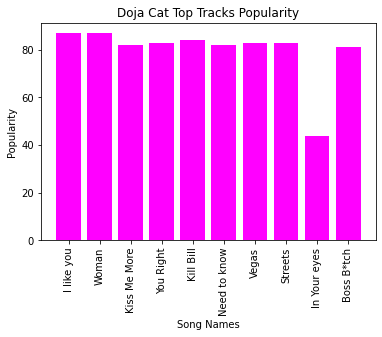

In [9]:
#plotpopularity = ['popularity']
#dojatracks_df[plotpopularity].plot.bar()
y_axis = dojatracks_df['popularity']
x_axis = ['I like you', 'Woman', 'Kiss Me More', 'You Right', 'Kill Bill', 'Need to know', 'Vegas', 'Streets', 'In Your eyes', 'Boss B*tch']
plt.bar(x_axis, y_axis, color = 'magenta',)
plt.xlabel('Song Names')
plt.xticks(rotation = 90)
plt.ylabel('Popularity')
plt.title('Doja Cat Top Tracks Popularity')
plt.savefig('dojacattoptracks.png', dpi=400)

In [38]:
realtedartists = response_relatedartist.json()['artists']


In [11]:
artistsdata = []
allgenres = []
for artist in realtedartists:
    artistinfo = {
        'genres': artist['genres'],
        'genre_count': len(artist['genres']),
        'name': artist['name'],
        'popularity': artist['popularity'],
    }
    artistsdata.append(artistinfo)
    genres = artist['genres']
    allgenres += genres

In [20]:
artists_df = pd.DataFrame(artistsdata)
artists_df
#allgenres = list(set(allgenres)) .. .set_index('name')
#print(len(allgenres))
#print(allgenres)
#combine all rap and pop together
#genres is in a list
#songlist_dict = {
    #'r&b': ['pop r&b', 'r&b', 'canadian contemporary r&b', 'uk contemporary r&b', 'alternative r&b'],
    #'rap': ['dmv rap', 'rap', 'trap queen', 'rap', 'rap latina', 'urban contemporary', 'metropopolis', 'alt z'],
    #'pop': ['pop r&b', 'dance pop', 'escape room','indie pop', 'art pop', 'colombian pop', 'pop', 'etherpop', 'electropop', 'canadian pop'],
#}

#renamed_df = artists_df.replace({"genres": {'pop r&b': 'r&b','dance pop': 'pop', 'dmv rap': 'rap', 'escape room': 'pop', 
                                          # 'trap queen': 'rap', 'indie pop': 'pop', 'art pop': 'pop', 'colombian pop': 'pop', 
                                          # 'etherpop': 'pop', 'urban contemporary': 'rap', 'metropopolis': 'rap','alt z': 'rap',
                                           #'rap latina': 'rap', 'canadian contemporary r&b': 'r&b', 'uk contemporary r&b': 'r&b',
                                           #'alternative r&b': 'r&b', 'electropop': 'pop','canadian pop': 'pop'}})
#renamed_df.info()

,genres,genre_count,name,popularity
0,[colombian pop],1,Kali Uchis,86
1,"[pop, r&b]",2,Kehlani,74
2,[etherpop],1,Alina Baraz,66
3,[r&b],1,Chloe x Halle,58
4,[r&b],1,Kiana Ledé,64
5,"[canadian contemporary r&b, canadian pop]",2,Jessie Reyez,71
6,"[art pop, electropop, indie pop]",3,Rina Sawayama,63
7,"[pop r&b, r&b]",2,Justine Skye,70
8,"[r&b, uk contemporary r&b]",2,Jorja Smith,72
9,"[alternative r&b, dance pop, metropopolis, pop...",6,Tinashe,67


No handles with labels found to put in legend.


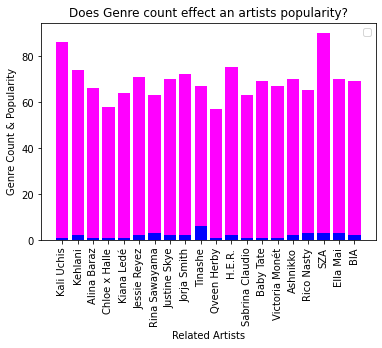

In [28]:
#plotartists = ['popularity', 'genre_count']
#artists_df[plotartists].plot.bar()
x_axis = artists_df['name']
y_axis1 = artists_df['popularity']
y_axis2 = artists_df['genre_count']
plt.bar(x_axis, y_axis1, color = 'magenta')
plt.bar(x_axis, y_axis2, color = 'blue')
plt.xlabel('Related Artists')
plt.xticks(rotation = 90)
plt.ylabel('Genre Count & Popularity')
plt.title('Does Genre count effect an artists popularity?')
plt.legend(loc = 0)
plt.savefig('genreandpopularity.png', dpi=400)

In [59]:
dojacatsong = response_audio.json()['beats']
dojacatsong2 = response_audio.json()['bars']
dojacatsong1 = response_audio.json()['sections']

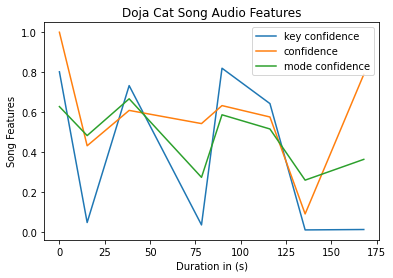

In [72]:
dojacatsong1_df = pd.DataFrame(dojacatsong1)
dojacatsong1_df['absloud'] = dojacatsong1_df['loudness'].map(abs)
dojacatsong1_df
x_axis = dojacatsong1_df['start']
y_axis = dojacatsong1_df['key_confidence']
y_axis1 = dojacatsong1_df['confidence']
y_axis2 = dojacatsong1_df['absloud']
y_axis3 = dojacatsong1_df['mode_confidence']
plt.plot(x_axis, y_axis, label="key confidence")
plt.plot(x_axis, y_axis1,label="confidence" )
#plt.plot(x_axis, y_axis2, label="loudness")
plt.plot(x_axis, y_axis3, label="mode confidence")
plt.title('Doja Cat Song Audio Features')
plt.xlabel('Duration in (s)')
plt.ylabel('Song Features')
plt.legend(loc="best")

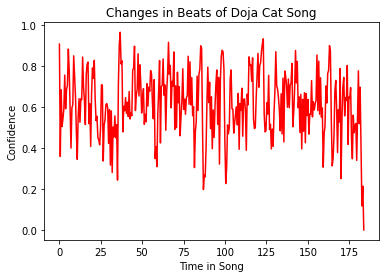

In [53]:
dojacatsong_df = pd.DataFrame(dojacatsong)
dojacatsong_df
dojacatsongbars_df = pd.DataFrame(dojacatsong2)
dojacatsongbars_df
x_axis1 = dojacatsong_df['start']
y_axis1 = dojacatsong_df['confidence']
x_axis = dojacatsong_df['start']
y_axis = dojacatsong_df['confidence']
plt.plot(x_axis, y_axis, color = 'red')
plt.xlabel('Time in Song')
plt.ylabel('Confidence')
plt.title('Changes in Beats of Doja Cat Song')
plt.savefig('dojacatsongconfidence.png', dpi=400)


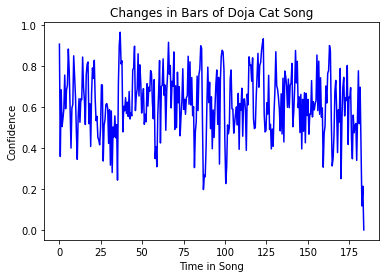

In [49]:
dojacatsongbars_df = pd.DataFrame(dojacatsong2)
dojacatsongbars_df
x_axis1 = dojacatsong_df['start']
y_axis1 = dojacatsong_df['confidence']
plt.plot(x_axis, y_axis, color = 'blue')
plt.xlabel('Time in Song')
plt.ylabel('Confidence')
plt.title('Changes in Bars of Doja Cat Song')
plt.savefig('dojacatsongbars.png', dpi=400)

In [31]:
putitonthefloor = response_audio_features.json()
putitonthefloor["title"] = "Put it on the Floor"
pprint(putitonthefloor)

{'acousticness': 0.0282,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6c6WmIHcHlhccEwSFBhzNa',
 'danceability': 0.849,
 'duration_ms': 185748,
 'energy': 0.614,
 'id': '6c6WmIHcHlhccEwSFBhzNa',
 'instrumentalness': 0,
 'key': 1,
 'liveness': 0.0603,
 'loudness': -7.323,
 'mode': 1,
 'speechiness': 0.317,
 'tempo': 111.363,
 'time_signature': 5,
 'title': 'Put it on the Floor',
 'track_href': 'https://api.spotify.com/v1/tracks/6c6WmIHcHlhccEwSFBhzNa',
 'type': 'audio_features',
 'uri': 'spotify:track:6c6WmIHcHlhccEwSFBhzNa',
 'valence': 0.472}


In [32]:
response_song2 = requests.get(api_url_audiofeatures2, headers = headers)
princessdiana = response_song2.json()
princessdiana["title"] = "Princess Diana"
pprint(princessdiana)

{'acousticness': 0.14,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0ZxhtATQ0a6EvQNZ0z6NKV',
 'danceability': 0.898,
 'duration_ms': 172125,
 'energy': 0.676,
 'id': '0ZxhtATQ0a6EvQNZ0z6NKV',
 'instrumentalness': 0,
 'key': 9,
 'liveness': 0.101,
 'loudness': -5.196,
 'mode': 1,
 'speechiness': 0.187,
 'tempo': 147.991,
 'time_signature': 4,
 'title': 'Princess Diana',
 'track_href': 'https://api.spotify.com/v1/tracks/0ZxhtATQ0a6EvQNZ0z6NKV',
 'type': 'audio_features',
 'uri': 'spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV',
 'valence': 0.742}


In [33]:
response_song3 = requests.get(api_url_audiofeatures3, headers = headers)
areacodes = response_song2.json()
areacodes["title"] = "Area Codes"
pprint(areacodes)

{'acousticness': 0.14,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0ZxhtATQ0a6EvQNZ0z6NKV',
 'danceability': 0.898,
 'duration_ms': 172125,
 'energy': 0.676,
 'id': '0ZxhtATQ0a6EvQNZ0z6NKV',
 'instrumentalness': 0,
 'key': 9,
 'liveness': 0.101,
 'loudness': -5.196,
 'mode': 1,
 'speechiness': 0.187,
 'tempo': 147.991,
 'time_signature': 4,
 'title': 'Area Codes',
 'track_href': 'https://api.spotify.com/v1/tracks/0ZxhtATQ0a6EvQNZ0z6NKV',
 'type': 'audio_features',
 'uri': 'spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV',
 'valence': 0.742}


In [60]:
songs = [areacodes, princessdiana, putitonthefloor]

columnstodrop = ['type', 'id', 'uri', 'track_href', 'analysis_url']
songs_df = pd.DataFrame(songs).drop(columns=columnstodrop).set_index("title")
songs_df['absloud'] = songs_df['loudness'].map(abs)
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,absloud
title,,,,,,,,,,,,,,
Area Codes,0.898,0.676,9,-5.196,1,0.187,0.1400,0,0.1010,0.742,147.991,172125,4,5.196
Princess Diana,0.898,0.676,9,-5.196,1,0.187,0.1400,0,0.1010,0.742,147.991,172125,4,5.196
Put it on the Floor,0.849,0.614,1,-7.323,1,0.317,0.0282,0,0.0603,0.472,111.363,185748,5,7.323


<AxesSubplot:xlabel='title'>

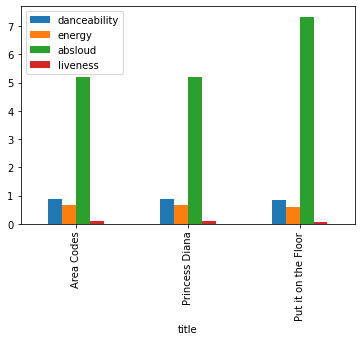

In [35]:
plotcolumns = ['danceability', 'energy','absloud','liveness']
songs_df[plotcolumns].plot.bar()

<AxesSubplot:xlabel='title'>

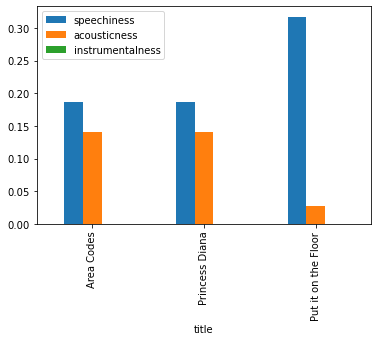

In [36]:
plotcolumns2 = ['speechiness', 'acousticness', 'instrumentalness']
songs_df[plotcolumns2].plot.bar()